Week 4 - Social Network Analysis - Jupyter Notebook

## 1. Collect Tweets 
We collect tweets from Twitter API v2. The bearer_token below has a cap, and please only use it for this class.

### 1.1 Search Tweets

In [21]:
import requests
import os
import json
import pandas as pd
import networkx as nx

In [42]:
# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
#bearer_token = os.environ.get("BEARER_TOKEN")
bearer_token =

search_url = "https://api.twitter.com/2/tweets/search/recent"

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
# expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields
query_params = {'query': 'GenAI OR AI Marketing'
                ,'tweet.fields': 'author_id,created_at,public_metrics'
                ,'user.fields':'username,public_metrics,description,url,verified,verified_type'
                ,'start_time':'2024-02-26T10:14:49Z'
                ,'end_time':'2024-02-27T10:14:49Z'
                ,'expansions':'entities.mentions.username,author_id'
                ,'max_results':10}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


json_response = connect_to_endpoint(search_url, query_params)
js = json.dumps(json_response, indent=4, sort_keys=True)  # Write it to a file:
with open('data/search_tweets.json', 'w') as fo: 
    fo.write(js)

print(js)


{
    "data": [
        {
            "author_id": "1686118425863639041",
            "created_at": "2024-02-27T10:14:43.000Z",
            "edit_history_tweet_ids": [
                "1762420993434210644"
            ],
            "entities": {
                "mentions": [
                    {
                        "end": 11,
                        "id": "1663269489515872267",
                        "start": 0,
                        "username": "GenAi_offi"
                    }
                ]
            },
            "id": "1762420993434210644",
            "public_metrics": {
                "bookmark_count": 0,
                "impression_count": 0,
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "@GenAi_offi 14JxTP6RxQWMQQzfD7urPTrnnqBbGkaFPpzbR11VUX8p"
        },
        {
            "author_id": "28119151",
            "created_at": "2024-02-2

### 1.2 Read the Data 

In [11]:
# Python program to read
# json file
 
 
# Opening JSON file
f = open('data/search_tweets.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
for i in data['data']:  #a for loop would loop over every element of the list data['data'].
    print(i)

for i in data['includes']['users']:
    print(i)
 
# Closing file
f.close()

{'author_id': '1686118425863639041', 'created_at': '2024-02-27T10:14:43.000Z', 'edit_history_tweet_ids': ['1762420993434210644'], 'entities': {'mentions': [{'end': 11, 'id': '1663269489515872267', 'start': 0, 'username': 'GenAi_offi'}]}, 'id': '1762420993434210644', 'public_metrics': {'bookmark_count': 0, 'impression_count': 0, 'like_count': 0, 'quote_count': 0, 'reply_count': 0, 'retweet_count': 0}, 'text': '@GenAi_offi 14JxTP6RxQWMQQzfD7urPTrnnqBbGkaFPpzbR11VUX8p'}
{'author_id': '28119151', 'created_at': '2024-02-27T10:14:33.000Z', 'edit_history_tweet_ids': ['1762420949251695046'], 'id': '1762420949251695046', 'public_metrics': {'bookmark_count': 0, 'impression_count': 11, 'like_count': 0, 'quote_count': 0, 'reply_count': 0, 'retweet_count': 0}, 'text': '5 vital questions to ask yourself before using AI at work https://t.co/mMyvlDLrLk #ai #artificialintelligence #genai'}
{'author_id': '1686118425863639041', 'created_at': '2024-02-27T10:14:20.000Z', 'edit_history_tweet_ids': ['1762420

## 2. Construct a Directed Network

Now, we will use the data above to construct a mentioning network.

### 2.1 Remove tweets that do not contain mentions.

In [12]:
# Filter the list to only include dictionaries that have the specified key
filtered_tweets = []
for tweet in data['data']:
    if 'entities' in tweet:
        filtered_tweets.append(tweet)

In [13]:
# The code above can be written as:
#filtered_tweets = [tweet for tweet in data['data'] if 'entities' in tweet]

In [14]:
# add username to the tweet. The tweet dictionary only included author_id but not username.
id_username={} # this is an empty dictionary
for user in data['includes']['users']:
    id_username.update({user['id']: user['username']}) # add key-value pairs to this dictionary.

 
for tweet in filtered_tweets:
    #if tweet['id'] in id_username:
    tweet['username'] = id_username[str(tweet['author_id'])]
 

### 2.2 Generate Edges 
Each dictionary represents a node pare of author_id and username.

In [15]:
edge=[] # This is an empty list.

i=0
for tweet in filtered_tweets:
    source=tweet['username']
    i=i+1
    print("This is the {}th user!".format(i))
    j=1
    for mention in tweet['entities']['mentions']:
            pair={"source":source,"target":mention["username"]}
            edge.append(pair)
            print("This is the {}th mentioned user!".format(j))
            j=j+1   

This is the 1th user!
This is the 1th mentioned user!
This is the 2th user!
This is the 1th mentioned user!
This is the 3th user!
This is the 1th mentioned user!
This is the 4th user!
This is the 1th mentioned user!
This is the 5th user!
This is the 1th mentioned user!
This is the 2th mentioned user!
This is the 6th user!
This is the 1th mentioned user!
This is the 2th mentioned user!
This is the 7th user!
This is the 1th mentioned user!
This is the 2th mentioned user!


In [16]:
edge_df=pd.DataFrame(edge)

In [17]:
edge_df

,source,target
0,SolomonChu69387,GenAi_offi
1,SolomonChu69387,GenAi_offi
2,MathurAnoop,cxocapital
3,usergrowth,Streetwisejnl
4,LordMogorCrypto,bullishbestie
5,LordMogorCrypto,CryptoThro
6,cihanev49349281,bullishbestie
7,cihanev49349281,CryptoThro
8,WSBSBULL,bullishbestie
9,WSBSBULL,CryptoThro


### 2.3 Generate the Network

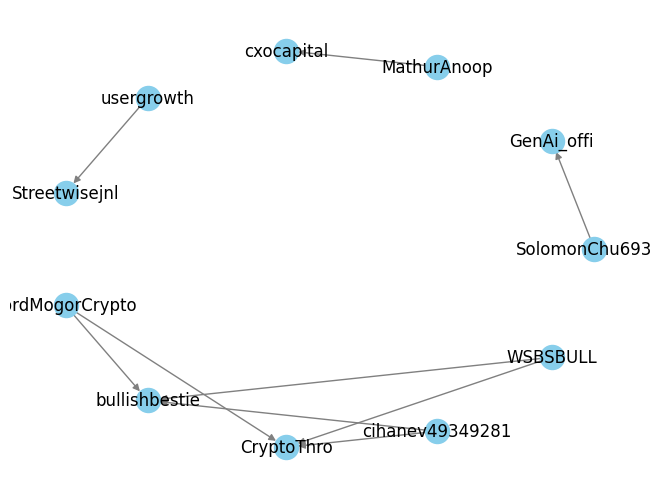

In [22]:
G=nx.from_pandas_edgelist(edge_df,
                            source="source",
                            target="target",
                            create_using=nx.DiGraph()) # No need to add create_using=nx.DiGraph() if it is an undirected graph

 
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray',pos = nx.circular_layout(G))


## 3. Node Attributes
Before, we've been using the data we collected on the fly during class time. Due to Twitter's API limit, we won't be able to collect too many tweets. Below, we will start to use a dataset I have collected earlier. Please stick to this dataset for further analysis.

- edgelist.csv
- user_info.csv

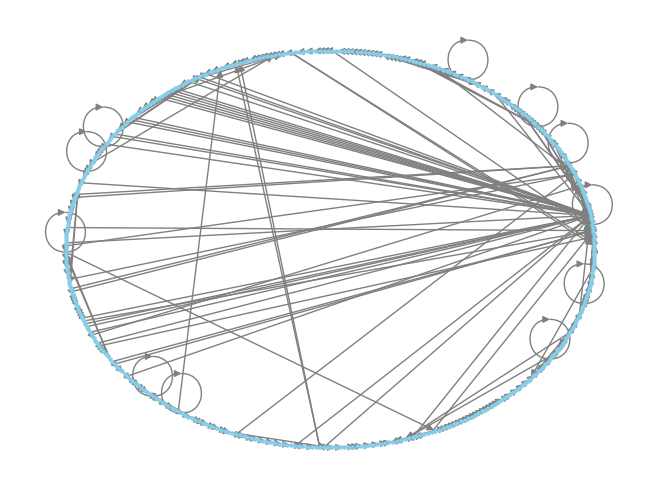

In [23]:
edge_df=pd.read_csv("data/edgelist.csv")

G=nx.from_pandas_edgelist(edge_df,
                            source="source",
                            target="target",
                            create_using=nx.DiGraph()) # No need to add create_using=nx.DiGraph() if it is an undirected graph

nx.draw(G, with_labels=False, node_size=5,node_color='skyblue', edge_color='gray',pos= nx.circular_layout(G))


### 3.1 Centrality

In [24]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
# Calculate in-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
# Calculate out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

### 3.2 Save Centrality as Node Attributes

In [25]:
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
nx.set_node_attributes(G, in_degree_centrality, 'in_degree_centrality')
nx.set_node_attributes(G, out_degree_centrality, 'out_degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

### 3.3 Examine Node Attributes 

In [26]:
for node, attributes in G.nodes(data=True):
    print(node)
    print(attributes)

gladeolie
{'eigenvector_centrality': 9.510434606460809e-17, 'in_degree_centrality': 0.0, 'out_degree_centrality': 0.0049382716049382715, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0}
Infosys
{'eigenvector_centrality': 7.323034646974816e-15, 'in_degree_centrality': 0.0049382716049382715, 'out_degree_centrality': 0.0, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0049382716049382715}
RafaelNadal
{'eigenvector_centrality': 7.323034646974816e-15, 'in_degree_centrality': 0.0049382716049382715, 'out_degree_centrality': 0.0, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0049382716049382715}
onr273
{'eigenvector_centrality': 9.510434606460809e-17, 'in_degree_centrality': 0.0, 'out_degree_centrality': 0.0024691358024691358, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0}
BrnMetaverse
{'eigenvector_centrality': 7.323034646974816e-15, 'in_degree_centrality': 0.0049382716049382715, 'out_degree_centrality': 0.0, 'betweenness_centrality': 0.0, 'closene

### 3.4 External Attributes

In [27]:
user_attribute=pd.read_csv("data/users_info.csv")
user_attribute.columns

Index(['protected', 'username', 'name', 'url', 'verified', 'location', 'id',
       'description', 'created_at', 'public_metrics.followers_count',
       'public_metrics.following_count', 'public_metrics.tweet_count',
       'public_metrics.listed_count', 'public_metrics.like_count',
       'withheld.country_codes'],
      dtype='object')

In [28]:
for index, row in user_attribute.iterrows():
    node_id = row['username']
    attributes = row.drop('username').to_dict()  # Convert row to dictionary excluding node_id
    nx.set_node_attributes(G, {node_id: attributes})

In [29]:
attributes_list=[]
for node, attributes in G.nodes(data=True):
    print(node)
    print(attributes)
    attributes_list.append(attributes)

gladeolie
{'eigenvector_centrality': 9.510434606460809e-17, 'in_degree_centrality': 0.0, 'out_degree_centrality': 0.0049382716049382715, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0, 'protected': False, 'name': 'ARYAN®', 'url': 'https://t.co/1PaUcEKvJT', 'verified': False, 'location': 'cyberspace', 'id': 54516759, 'description': 'Just a common man with a scientific temper.\n#geek #technosavvy #geopolitics #nature #health #astrophyscics #blogger #fashion\n\nRetweet is not an endorsement.®©', 'created_at': '2009-07-07T11:18:59.000Z', 'public_metrics.followers_count': 1541, 'public_metrics.following_count': 2645, 'public_metrics.tweet_count': 423931, 'public_metrics.listed_count': 227, 'public_metrics.like_count': 25291, 'withheld.country_codes': nan}
Infosys
{'eigenvector_centrality': 7.323034646974816e-15, 'in_degree_centrality': 0.0049382716049382715, 'out_degree_centrality': 0.0, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.0049382716049382715, 'protected': F

## 4. Predictive Analysis

### 4.1 Variable Conversion

In [30]:
# verified is logical and needs to be converted to numeric before being used as a predictor.
attributes_df=pd.DataFrame(attributes_list)
attributes_df['verified']=attributes_df['verified'].astype(int)
attributes_df['datetime']=pd.to_datetime(attributes_df['created_at'])
attributes_df['years_difference'] = (pd.Timestamp.now().tz_localize('UTC') - attributes_df['datetime']).dt.days / 365.25


In [83]:
attributes_df.columns

Index(['eigenvector_centrality', 'in_degree_centrality',
       'out_degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'protected', 'name', 'url', 'verified',
       'location', 'id', 'description', 'created_at',
       'public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count',
       'public_metrics.like_count', 'withheld.country_codes', 'datetime',
       'years_difference'],
      dtype='object')

### 4.2 Assembling the Data

In [93]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Predictors
X=attributes_df[['eigenvector_centrality','public_metrics.like_count','public_metrics.following_count','public_metrics.tweet_count', 'verified',
       'betweenness_centrality', 'closeness_centrality','out_degree_centrality','years_difference']]
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to your data (computes mean and standard deviation)
scaler.fit(X)
X_standardized= scaler.transform(X)

X = pd.DataFrame(X_standardized, columns=X.columns)

# Outcome
y=np.log1p(attributes_df['public_metrics.followers_count'].astype(int) )

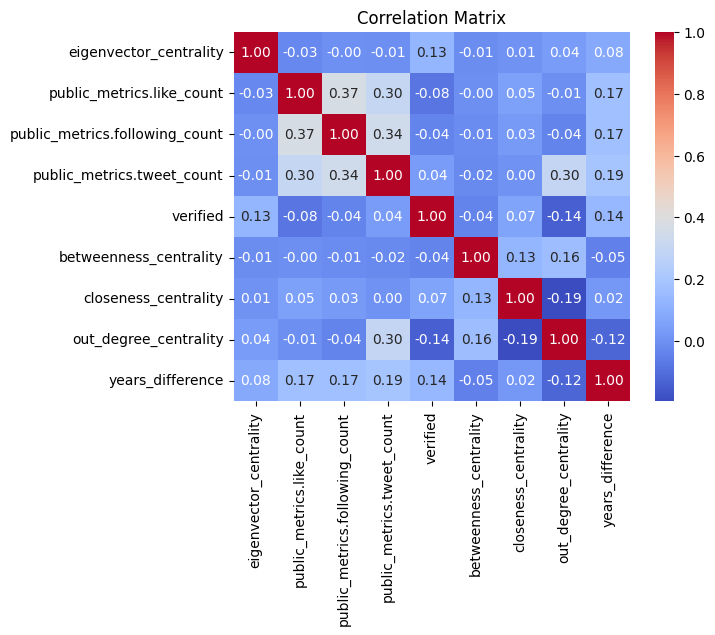

In [94]:
correlation_matrix = X.corr()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 4.3 Training and Testing Partition

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.4 Model Fitting

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

 # Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X, y)
# Make predictions and evaluate the model

 

RandomForestRegressor(random_state=42)

### 4.5 Model Evaluation

In [97]:
predictions = regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error: {}".format(mse))
print("Root Mean Squared Error: {}".format(rmse))
 

Mean Squared Error: 0.7054814687318972
Root Mean Squared Error: 0.839929442710456


### 4.6 Linear Regression

In [98]:
# Baseline - Linear Regression
import statsmodels.api as sm

linear_regression = sm.OLS(y_train, X_train)
linear_regression = linear_regression.fit()
predictions = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error: {}".format(mse))
print("Root Mean Squared Error: {}".format(rmse))

# Report coefficients
print(linear_regression.summary())


Mean Squared Error: 135.40816300206984
Root Mean Squared Error: 11.636501321362442
                                       OLS Regression Results                                      
Dep. Variable:     public_metrics.followers_count   R-squared (uncentered):                   0.125
Model:                                        OLS   Adj. R-squared (uncentered):              0.100
Method:                             Least Squares   F-statistic:                              5.006
Date:                            Thu, 28 Mar 2024   Prob (F-statistic):                    2.58e-06
Time:                                    15:02:21   Log-Likelihood:                         -1120.7
No. Observations:                             324   AIC:                                      2259.
Df Residuals:                                 315   BIC:                                      2293.
Df Model:                                       9                                                  
Covariance Type: 

### 4.7 Feature Importance

betweenness_centrality            0.001903
eigenvector_centrality            0.005004
out_degree_centrality             0.039869
public_metrics.like_count         0.055229
years_difference                  0.065864
verified                          0.087326
public_metrics.following_count    0.156362
public_metrics.tweet_count        0.232385
closeness_centrality              0.356057
dtype: float64

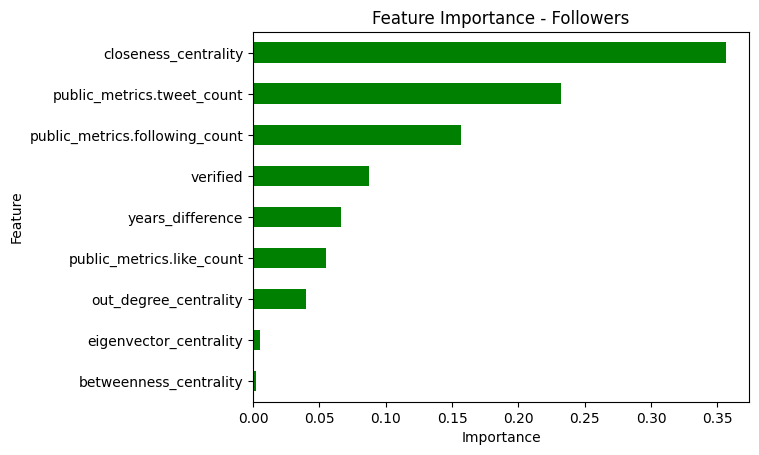

In [99]:
from matplotlib import pyplot as plt
#feature_names = [f"feature {i}" for i in range(W.shape[1])]
global_importances = pd.Series(regressor.feature_importances_, index=X.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Followers")
global_importances

# 5 Practice

## 5.1 Context
I collected this dataset a few years back. I focus on the seed of Nike Facebook Page, and collected all the Facebook pages liked by Nike. (The page has changed a lot, but the key idea is the same).

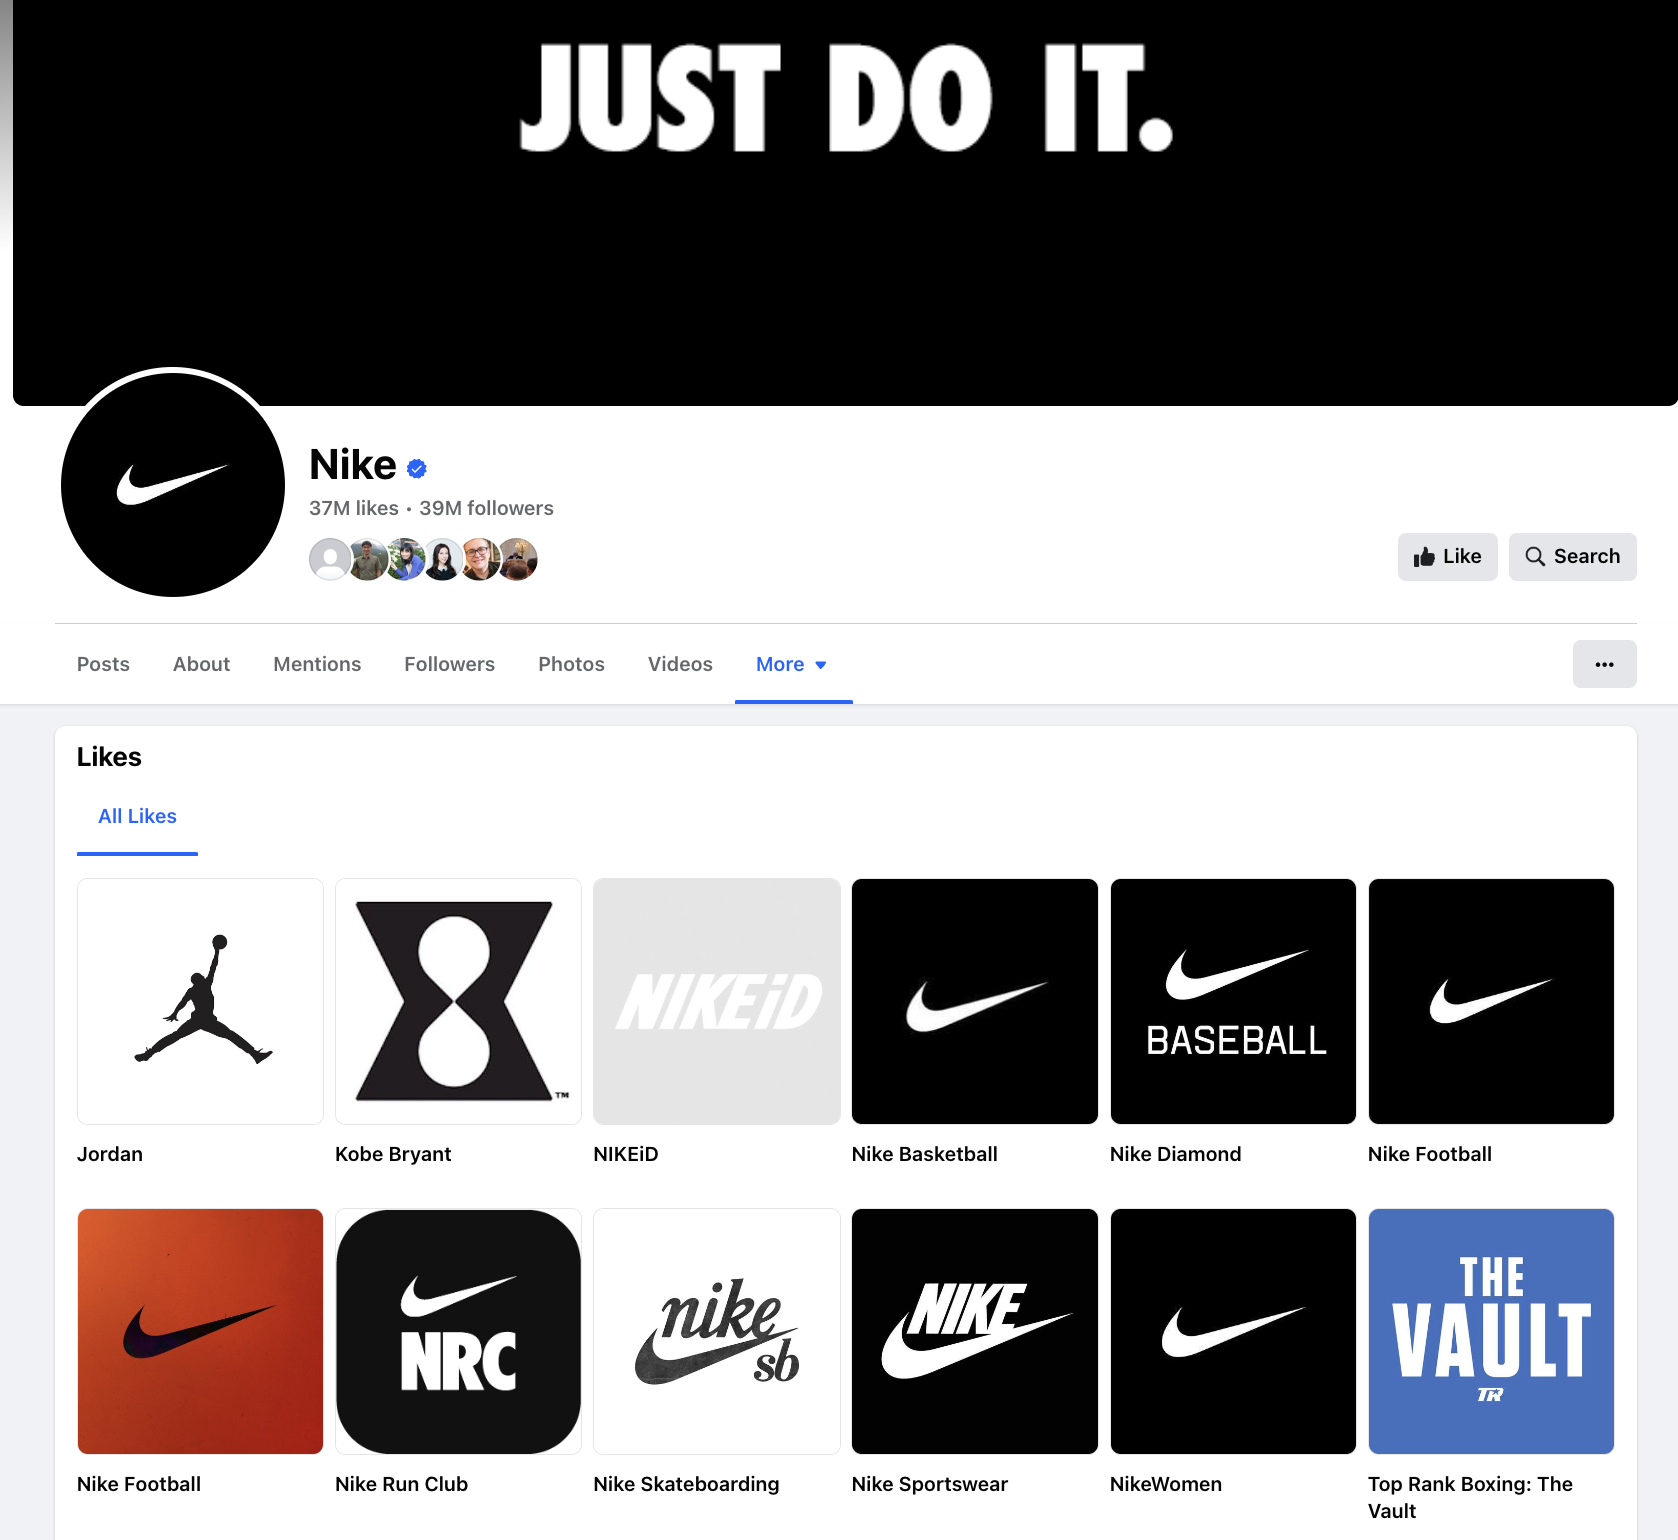


## 5.2 Import Data

In [100]:
edgelist=pd.read_csv('facebook_data.csv')

## 5.3 Network Visualization

In [ ]:
#Can you plot the network using the layout mechanism defined by the following code?

#pos= nx.kamada_kawai_layout(G)

## 5.4 Centrality

In [108]:
# Calculate eigenvector centrality
eigenvector_centrality =  #complete the code
# Calculate in-degree centrality
in_degree_centrality =  #complete the code
# Calculate out-degree centrality
out_degree_centrality =  #complete the code
# Calculate betweenness centrality
betweenness_centrality =  #complete the code
# Calculate closeness centrality
closeness_centrality =  #complete the code

In [109]:
# Save node attributes into the network.
nx.set_node_attributes(
    #complete the code
)
nx.set_node_attributes(
    #complete the code
)
nx.set_node_attributes(
    #complete the code
)
nx.set_node_attributes(
    #complete the code
)
nx.set_node_attributes(
    #complete the code
)

In [ ]:
# Check the node-level attributes
for node, attributes in G.nodes(data=True):
    print(node)
    print(attributes)

> using these attributes, we can generate a subnetwork to better illustrate the network structure.

In [ ]:
nodes = (
    node
    for node, data
    in G.nodes(data=True)
    if data.get("in_degree_centrality") >0.04
)
subgraph = G.subgraph(nodes)

nx.draw(subgraph, with_labels=True, node_size=30,node_color='skyblue',width=0.5, edge_color='gray',pos= nx.kamada_kawai_layout(G))


## 5.4 External Attributes

In [112]:
node_attribute=pd.read_csv('facebook_node_attributes.csv')
node_attribute.columns

Index(['Unnamed: 0', 'name', 'username', 'label', 'category', 'post_activity',
       'fan_count', 'talking_about_count', 'users_can_post'],
      dtype='object')

In [114]:
# Which attributes do you want to keep as node attributes? 
# Let's get rid of ['username','name','Unnamed: 0'] and add the rest of the attributes to the network.

for index, row in node_attribute.iterrows():
    #complete the code 

In [ ]:
# Generate a list of node attributes
attributes_list=[]
for node, attributes in G.nodes(data=True):
    #complete the code

In [ ]:
#Save the list of attributes into a dataframe.